In [1]:
import time, requests, os, math, numpy
import pandas as pd
from pandas import DataFrame, Series
from math import pi,sin,cos,asin,sqrt

def download(filename, url):
    # We do not download again if the file already exists
    # TODO: Write the code to download the file from URL
    # and save it in `filename`
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    else:
        r = requests.get(url)
        r.raise_for_status()
        data = r.text
        f = open(filename, "w", encoding="utf-8")
        f.write(data)
        f.close()
    return (str(filename) + " created!")

In [ ]:
#draft:
# sa_to_all_distance['Chile'].tolist()
# list(filter(no_nan, sa_to_all_distance['Chile'].tolist()))
# #Q13: What is the least central country in South America?
# sa_to_all_distance = find_group_distance(list(countries['country']),select_countries('continent','South America'))
# new_sa_to_all_distance = sa_to_all_distance.copy(deep=True)
# # new_sa_to_all_distance['Sum'] = new_sa_to_all_distance.apply(lambda x: new_avg(x))
# # new_sa_to_all_distance['Sum'].sort_values(ascending = True).index[0]
# new_sa_to_all_distance.loc['Avg'] = new_sa_to_all_distance.apply(lambda x: new_avg(x))
# new_sa_to_all_distance.loc['Avg'].sort_values(ascending = False).index[0]

In [2]:
download('countries.json', 'https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json')

'countries.json already exists!'

In [3]:
countries = pd.read_json('countries.json')

In [4]:
countries.head()

area  birth-rate  coastline      continent           country  death-rate  \
0  756950       15.23       0.85  South America             Chile        5.81   
1     665       17.80      24.21           Asia           Bahrain        4.14   
2   22966       28.84       1.68  North America            Belize        5.72   
3  582650       39.72       0.09         Africa             Kenya       14.02   
4   11854       33.05       3.12      Australia  Marshall Islands        4.78   

   gdp-per-capita  infant-mortality literacy  net-migration phones  \
0            9900              8.80     96,2           0.00  213,0   
1           16900             17.27     89,1           1.05  281,3   
2            4900             25.69     94,1           0.00  115,7   
3            1000             61.47     85,1          -0.10    8,1   
4            1600             29.45     93,7          -6.04   91,2   

   population               region  
0    16134219  LATIN AMER. & CARIB  
1      698585            NEAR EAST  
2      287730  LATIN AMER. & CARIB  
3    34707817   SUB-SAHARAN AFRICA  
4       60422              OCEANIA

In [5]:
#q1
len(countries)

174

In [6]:
#Q2: what is the total population across all the countries in our dataset?
# find_sum = lambda x:x.sum()
# total_data = countries.apply(find_sum)
# total_data['population']
countries['population'].sum()

6261901793

In [7]:
download('capitals.json','https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json')

'capitals.json already exists!'

In [8]:
capitals = pd.read_json('capitals.json')
capitals.head()

country       capital   latitude  longitude
0  Afghanistan         Kabul  34.516667  69.183333
1      Albania        Tirana  41.316667  19.816667
2      Algeria       Algiers  36.750000   3.050000
3     Anguilla    The Valley  18.216667 -63.050000
4    Argentina  Buenos Aires -34.583333 -58.666667

In [9]:
#Q3: What are the capital names in capitals.json?
capital_names = list(capitals['capital'])
sorted(capital_names, 
       #key = lambda x:x[0], 
       reverse = True)

['Zagreb',
 'Yerevan',
 'Yaounde',
 'Windhoek',
 'Wellington',
 'Washington, D.C.',
 'Warsaw',
 'Vilnius',
 'Vientiane',
 'Vienna',
 'Victoria',
 'Valletta',
 'Vaduz',
 'Ulaanbaatar',
 'Tunis',
 'Tripoli',
 'Tokyo',
 'Tirana',
 'Thimphu',
 'The Valley',
 'Tehran',
 'Tegucigalpa',
 'Tbilisi',
 'Tashkent',
 'Tallinn',
 'Taipei',
 'Suva',
 'Stockholm',
 'Sofia',
 'Singapore',
 'Santo Domingo',
 'Santiago',
 'Sanaa',
 'San Salvador',
 'San Marino',
 'San Juan',
 'San Jose',
 'Saint George’s',
 'Roseau',
 'Rome',
 'Riyadh',
 'Riga',
 'Reykjavik',
 'Rabat',
 'Quito',
 'Pretoria',
 'Praia',
 'Prague',
 'Porto-Novo',
 'Port-au-Prince',
 'Port-Vila',
 'Port Moresby',
 'Port Louis',
 'Phnom Penh',
 'Paris',
 'Paramaribo',
 'Papeete',
 'Panama City',
 'Ouagadougou',
 'Ottawa',
 'Oslo',
 'Oranjestad',
 'N’Djamena',
 'Nuku’alofa',
 'Noumea',
 'Nouakchott',
 'Niamey',
 'New Delhi',
 'Nairobi',
 'Muscat',
 'Moscow',
 'Moroni',
 'Montevideo',
 'Monrovia',
 'Monaco',
 'Mogadishu',
 'Minsk',
 'Mexico Ci

In [10]:
def find_corresponding_values(name, name_column, column):
    values = list(capitals[column])
    idx = None
    for i in range(len(values)):
        if values[i] == name:
            idx = i
    new_column = list(capitals[name_column])
    return new_column[idx]


In [11]:
#Q4: What is the capital of Italy?
find_corresponding_values(name = 'Italy', column = 'country', name_column = 'capital')

'Rome'

In [12]:
#Q5: Which country's capital is Brussels?
find_corresponding_values('Brussels','country','capital')

'Belgium'

In [13]:
#Q6: Which 7 countries have the southern-most capitals?
def return_sorted_df(key, nums, key_2): 
    return capitals.sort_values(by=[key])[key_2].values.tolist()[:nums]
return_sorted_df('latitude',7,'country')

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [14]:
#Q7: Which 10 countries have the capitals closest to the North Pole?
funcs = lambda x,y,z : capitals.sort_values(by=[x], ascending = False)[y].values.tolist()[:z]
funcs('latitude','country',10)

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [15]:
#Q8: What is the distance between Camp Randall Stadium and the Wisconsin State Capital?
#Haversine Formula (from R.W. Sinnott, "Virtues of the Haversine", Sky and Telescope, vol. 68, no. 2, 1984, p. 159):
def calculate_distance(lat1,lon1,lat2,lon2):
    pi = math.pi
    R = 3956
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    lon1 = math.radians(lon1)
    lon2 = math.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2.0)) ** 2.0 + cos(lat1) * cos(lat2) * (sin(dlon/2.0)) ** 2.0
    a = sqrt(a ** 2.0)
    c = 2.0 * asin(min(1,sqrt(a)))
    d = R * c
    return d



In [16]:
calculate_distance(43.070231,-89.411893,43.074645,-89.384113)

1.433899492072933

In [17]:
def find_distance(country1,country2):
    lat1 = float(capitals[(capitals['country'] == country1)]['latitude'])
    lon1 = float(capitals[(capitals['country'] == country1)]['longitude'])
    lat2 = float(capitals[(capitals['country'] == country2)]['latitude'])
    lon2 = float(capitals[(capitals['country'] == country2)]['longitude'])
    return calculate_distance(lat1,lon1,lat2,lon2)

In [18]:
#Q9: What is the distance between Germany and Norway?
find_distance('Germany','Norway')

520.8581822565818

In [19]:
#Q10: What are the distances between Switzerland, Netherlands and Spain?
def find_group_distance(list_1, *args):
    df = DataFrame()
    list_2 = list_1
    for i in args:
        list_2 = i
    for i in list_2:
        Distance_list = []
        for j in list_1:
            if i == j:
                Distance_list.append('NaN')
            else:
                Distance_list.append(find_distance(i,j))
        df[i] = Distance_list
        df.set_index([list_1], inplace = True)
    return df

In [40]:
#Q10: What are the distances between Switzerland, Netherlands and Spain?
def find_group_distance_2(list_1, *args):
    df = DataFrame()
    list_2 = list_1
    for i in args:
        list_2 = i
    for i in list_2:
        Distance_list = []
        for j in list_1:
            if i == j:
                Distance_list.append(None)
            else:
                Distance_list.append(find_distance(i,j))
        df[i] = Distance_list
        df.set_index([list_1], inplace = True)
    return df

In [20]:
#Q10: What are the distances between Switzerland, Netherlands and Spain?
find_group_distance(['Switzerland','Netherlands','Spain'])

Switzerland Netherlands    Spain
Switzerland         NaN     392.029  714.804
Netherlands     392.029         NaN  919.684
Spain           714.804     919.684      NaN

In [21]:
def test_args(args, *haha):
    list_1 = []
    list_1.append(args)
    for i in haha:
        list_2 = [i]
    return list_1

test_args('a')

['a']

In [22]:
#Q11: What is the distance between every pair of countries in the South American continent?
def select_countries(column,keyword):
    return list(countries[(countries[column] == keyword)]['country'])
sa_countries_d = find_group_distance(select_countries('continent','South America'))

In [23]:
#sa_countries_d.apply(lambda x: x.sum(), axis=1)
def no_nan(a):
    return not a == 'NaN'
def new_avg(x):
    return sum(list(filter(no_nan, x.tolist())))/len(list(filter(no_nan, x.tolist())))

In [24]:
#Q12: What is the most central country in the South American continent?
sa_countries_d['Avg'] = sa_countries_d.apply(lambda x: new_avg(x), axis=1)
# new_sa_countries_d.loc['Avg'] = new_sa_countries_d.apply(lambda x: new_sum(x))
sa_countries_d['Avg'].sort_values(ascending = True).index[0]

'Bolivia'

In [30]:
#Q13: What is the least central country in South America?
sa_countries_d['Avg'].sort_values(ascending = False).index[0]

'Uruguay'

In [46]:
sa_countries_d_2 = find_group_distance_2(select_countries('continent','South America'))
sa_countries_d_2['Avg'] = sa_countries_d_2.apply(lambda x: new_avg(x), axis=1)
sa_countries_d_2

Chile       Guyana     Colombia     Suriname       Brazil  \
count    11.000000    11.000000    11.000000    11.000000    11.000000   
mean   1899.423276  1781.206384  1752.347700  1817.944688  1735.433049   
std     903.919117   899.474743   899.903153   840.991410   450.004592   
min     690.784168   215.336336   451.004119   215.336336   908.185710   
25%    1072.188719  1294.130032  1136.285835  1438.039683  1435.618034   
50%    1869.737031  1747.772670  1512.119255  1778.772975  1709.071018   
75%    2766.227688  2535.904374  2487.130283  2476.870938  2098.230597   
max    3043.657689  2897.553095  2962.230943  2895.810776  2344.584922   

           Bolivia    Venezuela    Argentina         Peru      Ecuador  \
count    11.000000    11.000000    11.000000    11.000000    11.000000   
mean   1379.729880  1908.047747  1877.407993  1562.676156  1748.596740   
std     364.249985  1002.896671  1072.171133   477.624191   784.574764   
min     669.926372   639.361118   143.069943   669.926372   451.004119   
25%    1253.750279   974.760452  1035.119935  1349.492774  1207.411387   
50%    1379.455701  1865.131181  1936.465790  1705.418003  1661.699022   
75%    1629.945963  2794.228630  2828.703445  1940.607903  2347.396355   
max    1865.131181  3207.352176  3157.624051  2046.571589  2791.196721   

           Uruguay     Paraguay  Avg  
count    11.000000    11.000000  0.0  
mean   1929.023336  1556.381982  NaN  
std    1076.923259   750.177755  NaN  
min     143.069943   646.036441  NaN  
25%    1122.749799   907.492483  NaN  
50%    2046.571589  1558.635236  NaN  
75%    2844.191354  2216.469625  NaN  
max    3207.352176  2544.799572  NaN

In [59]:
def find_neighbor(distance):
    sa_countries = select_countries('continent','South America')
    df = DataFrame()
    idx = []
    value = []
    if distance == 'nearest':
        for i in sa_countries:
            idx.append(sa_countries_d_2[i].idxmin())
            value.append(sa_countries_d_2[i].min())
        df['nearest'] = idx
        df['distance'] = value
        df.set_index([sa_countries], inplace = True)
    elif distance == 'furthest':
        for i in sa_countries:
            idx.append(sa_countries_d_2[i].idxmax())
            value.append(sa_countries_d_2[i].max())
        df['nearest'] = idx
        df['distance'] = value
        df.set_index([sa_countries], inplace = True)
    else:
        print('Wrong Input')
    return df


In [60]:
#Q14: How close is each country in South America to it's nearest neighbor?
find_neighbor('nearest')

nearest    distance
Chile      Argentina  690.784168
Guyana      Suriname  215.336336
Colombia     Ecuador  451.004119
Suriname      Guyana  215.336336
Brazil      Paraguay  908.185710
Bolivia         Peru  669.926372
Venezuela   Colombia  639.361118
Argentina    Uruguay  143.069943
Peru         Bolivia  669.926372
Ecuador     Colombia  451.004119
Uruguay    Argentina  143.069943
Paraguay   Argentina  646.036441

In [61]:
#Q15: How far is each country in South America to it's furthest neighbor?
find_neighbor('furthest')

nearest     distance
Chile      Venezuela  3043.657689
Guyana         Chile  2897.553095
Colombia     Uruguay  2962.230943
Suriname       Chile  2895.810776
Brazil       Ecuador  2344.584922
Bolivia    Venezuela  1865.131181
Venezuela    Uruguay  3207.352176
Argentina  Venezuela  3157.624051
Peru         Uruguay  2046.571589
Ecuador      Uruguay  2791.196721
Uruguay    Venezuela  3207.352176
Paraguay   Venezuela  2544.799572

In [69]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

age     height
0  6.326109  14.815375
1  2.520450   4.542730
2  6.664127  16.109975
3  7.828595  18.927026
4  6.072260  15.299547

In [ ]:
def drop_nan(x):
    return x.drop([x])
#sa_countries_d.apply(lambda x: x.sum(), axis=1)
def find_furthest(x):
    return list(filter(no_nan, x.tolist()))
def sort_omit_nan(x):
    return sa_to_all_distance.loc[x].astype(float).sort_values(asceding = True)

In [ ]:
import random

ages = []
heights = []
for i in range(100):
    age = random.uniform(1, 10)
    noise = random.uniform(-1.5, 1.5)
    height = age * 2.3 + noise
    ages.append(age)
    heights.append(height)

trees = DataFrame({"age":ages, 'height':heights})
trees.head()

Text(0, 0.5, 'Height (feet)')

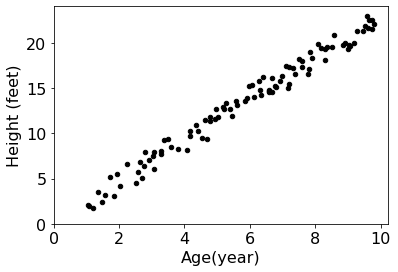

In [76]:
# tree scatter
import matplotlib
matplotlib.rcParams["font.size"] = 16

ax = trees.plot.scatter(x="age", y="height", c='k', xlim=0, ylim=0)
ax.set_xlabel("Age(year)")
ax.set_ylabel("Height (feet)")

In [77]:
trees["height-fitted"] = trees["age"] * 2
trees.head()

age     height  height-fitted
0  6.326109  14.815375      12.652218
1  2.520450   4.542730       5.040900
2  6.664127  16.109975      13.328253
3  7.828595  18.927026      15.657189
4  6.072260  15.299547      12.144520

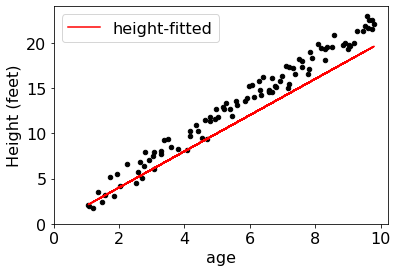

In [79]:
# tree scatter
import matplotlib
matplotlib.rcParams["font.size"] = 16

ax = trees.plot.scatter(x="age", y="height", c='k', xlim=0, ylim=0)
ax.set_xlabel("Age(year)")
ax.set_ylabel("Height (feet)")

trees.plot.line(ax=ax, x="age", y="height-fitted", color="red")

In [80]:
import numpy as np
np.array([1,2,3,4,5,6,7,8])
matrix = np.array([1,2,3,4,5,6,7,8]).reshape(2, 4)
matrix

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [81]:
matrix = np.array([1,2,3,4,5,6,7,8]).reshape(4, 2)
matrix

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [83]:
matrix[2][1]

6

In [85]:
output = trees["height"]
trees["one"] = 1
inputs = trees[["age", "one"]]
inputs.head()

age  one
0  6.326109    1
1  2.520450    1
2  6.664127    1
3  7.828595    1
4  6.072260    1

In [86]:
result = np.linalg.lstsq(inputs, output, rcond=None)
result

(array([2.26112115, 0.28204604]),
 array([66.18162694]),
 2,
 array([63.43732642,  3.9398753 ]))

In [87]:
slope = result[0][0]
intercept = result[0][1]
slope, intercept

(2.2611211489161125, 0.2820460433987669)

In [88]:
trees["height-fitted"] = trees["age"] * slope + intercept
trees.head()

age     height  height-fitted  one
0  6.326109  14.815375      14.586145    1
1  2.520450   4.542730       5.981089    1
2  6.664127  16.109975      15.350444    1
3  7.828595  18.927026      17.983447    1
4  6.072260  15.299547      14.012162    1

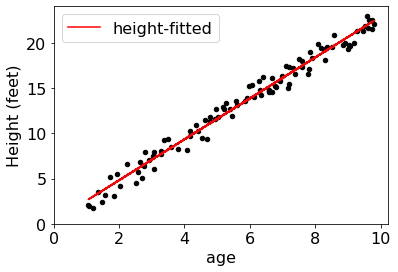

In [90]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

ax = trees.plot.scatter(x="age", y="height", c="black", xlim=0, ylim=0)
ax.set_xlabel("Age (years)")
ax.set_ylabel("Height (feet)")

trees.plot.line(ax=ax, x="age", y="height-fitted", color="red")

In [ ]:
conn.close()